**Step 1: Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression


**Step 2: Load the Dataset**

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**Step 3: Data Preprocessing**

In [6]:
if "Id" in df.columns:
    df.drop("Id", axis=1, inplace=True)

In [7]:
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])

df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Step 4: Split Features & Target**

In [8]:
X = df.drop("Species", axis=1)
y = df["Species"]


**Step 5: Train-Test Split**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Step 6: Train the Machine Learning Model**

In [10]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

**Step 7: Make Predictions**

In [14]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

**Step 8: Evaluate Model Performance**

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**Classification Report**

In [13]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



**Confusion Matrix**

In [15]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Step 9: Conclusion (Markdown Cell)

In this project, we trained a machine learning classification model using the Iris dataset.
Logistic Regression was used to classify flowers into Setosa, Versicolor, and Virginica species based on their measurements.
The model achieved high accuracy, demonstrating the effectiveness of supervised classification techniques in machine learning.

**Exploratory Data Analysis (EDA) – Iris Dataset (Optional)**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Pairplot (MOST IMPORTANT PLOT**

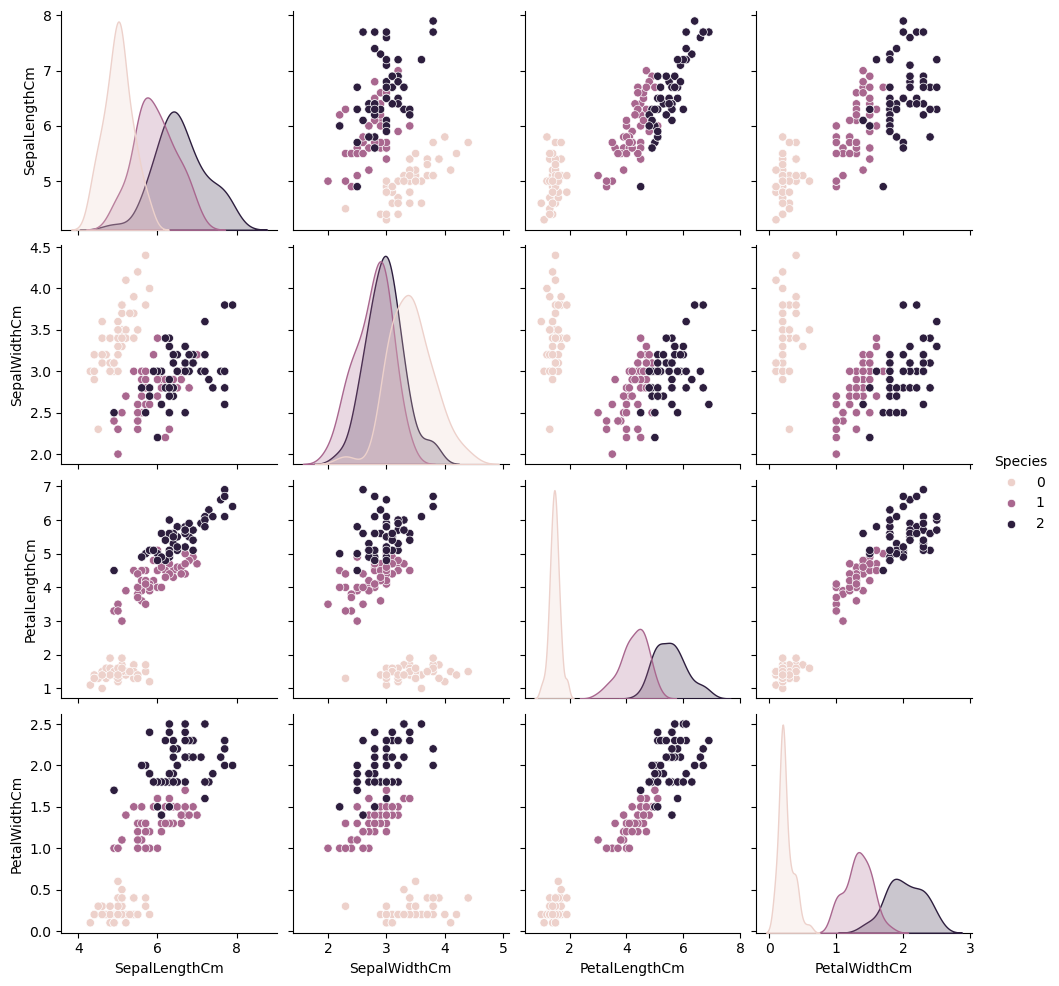

In [21]:
sns.pairplot(df, hue="Species")
plt.show()

**Feature Distribution (Histograms)**

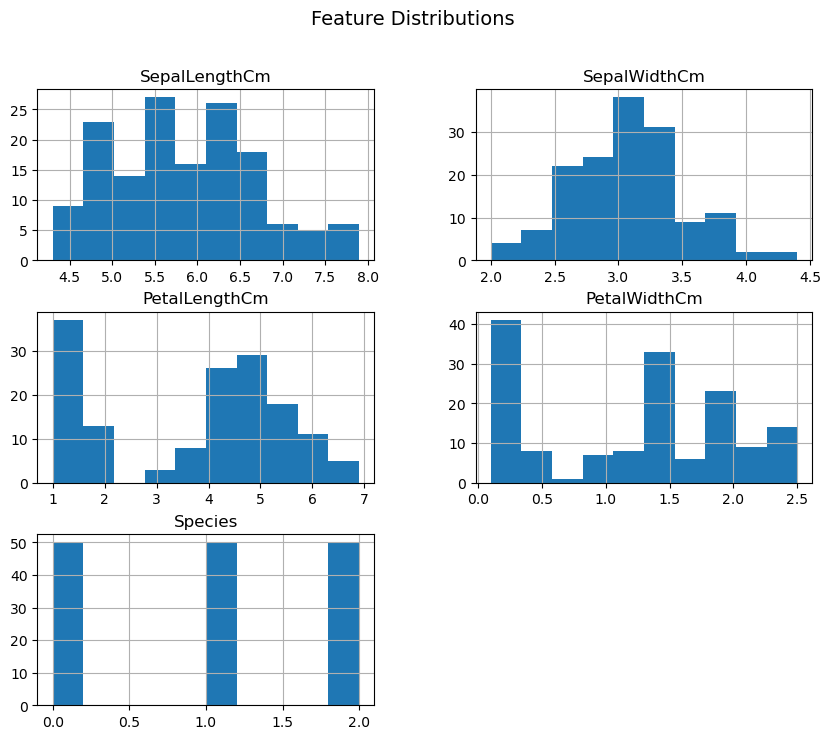

In [22]:
df.hist(figsize=(10, 8))
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

**Boxplots (Detect Outliers)**

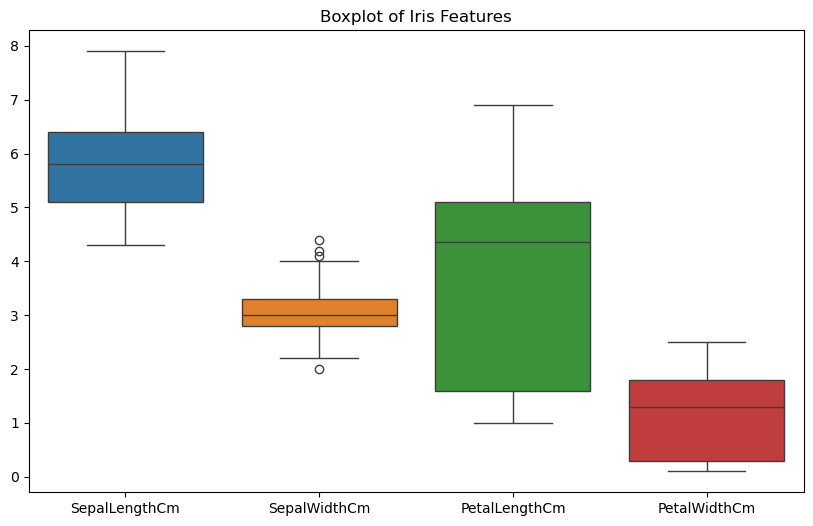

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop("Species", axis=1))
plt.title("Boxplot of Iris Features")
plt.show()

**Species-wise Feature Comparison**

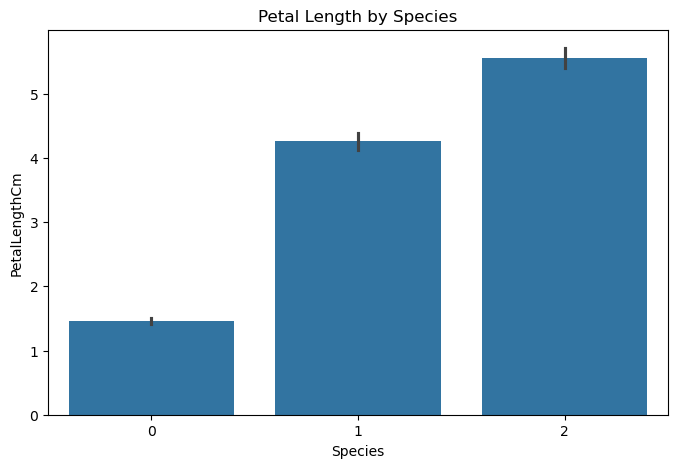

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Species", y="PetalLengthCm", data=df)
plt.title("Petal Length by Species")
plt.show()

**Correlation Heatmap**

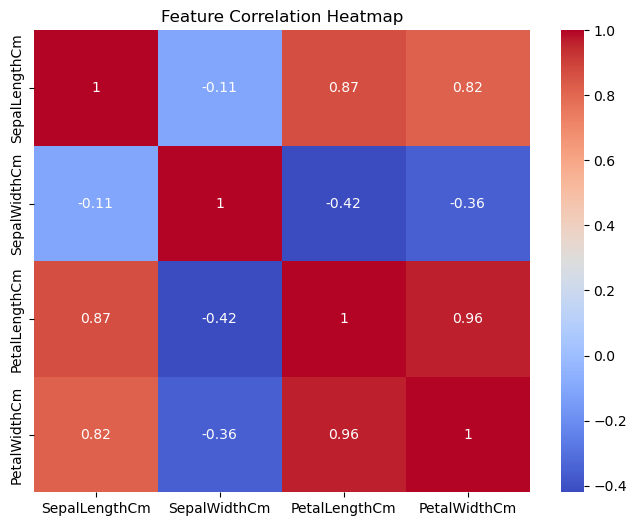

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop("Species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()